$\Delta u = 2cos(2x) - cos(y)$

$u|_{\delta \Omega} = sin^2(x) + cos(y)$

Точное решение: $u(x, y) = sin^2(x) + cos(y)$

$q = grad(u)$

Из интегрального равенства, теоремы Остроградского-Гаусса и приближения производной:

$f(x, y) \frac{\sqrt 3}{4 N^2} =  \sqrt 3 (u_{n_1} + u_{n_2} + u_{n_3} - 3u_n)$

$f(x, y)\frac{1}{4 N^2} = (u_{n_1} + u_{n_2} + u_{n_3} - 3u_n)$

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
plt.style.use('seaborn')

In [2]:
def fun_border(x, y):
    return (math.sin(x)**2 + math.cos(y))
def fun(x, y, N):
    return (1.0 / (4 * N * N)) * (2 * math.cos(2 * x) - math.cos(y))  

N = 10

In [3]:
N = 10
M = 6 * N * N #общее число треугольников
Matrix = np.zeros((M, M))
F = np.zeros((M))
num = 0
sqrt = math.sqrt(3)
for k in range(0, N):
    for i in range(0, 2 * N + (2 * k + 1)):
        if (i % 2 == 0):
            F[num] = fun(-1.0 / 2 + (i - k) * (1.0 / (2 * N)), -sqrt / 2 + 1.0 / (N * sqrt) + k * (sqrt / (N * 2)), N)
            if (i == 0 and k != N - 1):
                F[num] -= 2 * fun_border(-1.0 / 2 - k * (1.0 / (2 * N)) - 1.0 / (4 * N), -sqrt / 2 + sqrt / (4 * N) + k * (sqrt / (2 * N)))
                Matrix[num, num] = -4.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num + 2 * N + 2 * k + 1 + 1] = 1.0
            elif ((i == 2 * N + (2 * k + 1) - 1) and k != N - 1):
                F[num] -= 2 * fun_border(1.0 / 2 + k * (1.0 / (2 * N)) + 1.0 / (4 * N), -sqrt / 2 + sqrt / (4 * N) + k * (sqrt / (2 * N)))
                Matrix[num, num] = -4.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 2 * N + 2 * k + 1 + 1] = 1.0
            elif(i != 0 and i != (2 * N + (2 * k - 1) + 1) and k != N - 1):
                Matrix[num, num] = -3.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num + 2 * N + 2 * k + 1 + 1] = 1.0
            elif(i == 0 and k == N - 1):
                F[num] -= 2 * fun_border(-1.0 / 2 - k * (1.0 / (2 * N)) - 1.0 / (4 * N), -sqrt / 2 + sqrt / (4 * N) + k * (sqrt / (2 * N)))
                Matrix[num, num] = -4.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num + 2 * N + 2 * k + 1] = 1.0   
            elif ((i == 2 * N + (2 * k + 1) - 1) and k == N - 1):
                F[num] -= 2 * fun_border(1.0 / 2 + k * (1.0 / (2 * N)) + 1.0 / (4 * N), -sqrt / 2 + sqrt / (4 * N) + k * (sqrt / (2 * N)))
                Matrix[num, num] = -4.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 2 * N + 2 * k + 1] = 1.0
            elif(i != 0 and i != (2 * N + (2 * k + 1) - 1) and k == N - 1):
                Matrix[num, num] = -3.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num + 2 * N + 2 * k + 1] = 1.0                                                            
        else:
            F[num] = fun(-1.0 / 2 + (i - k) * (1.0 / (2 * N)), -sqrt / 2 + 1.0 / (2 * N * sqrt) + k * (sqrt / (N * 2)), N)
            if(k == 0):
                F[num] -= 2 * fun_border(-1.0 / 2 + i * (1.0 / (2 * N)), -sqrt / 2)
                Matrix[num, num] = -4.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 1] = 1.0
            else:
                Matrix[num, num] = -3.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num - (2 * N + 2 * k + 1 - 1)] = 1.0
        num += 1
for k in range(N - 1, -1, -1):
    for i in range(0, 2 * N + (2 * k + 1)):
        if (i % 2 == 0):
            F[num] = fun(1.0 / 2 - (i - k) * (1.0 / (2 * N)), sqrt / 2 - 1.0 / (N * sqrt) - k * (sqrt / (N * 2)), N)  
            if (i == 0 and k != N - 1):
                F[num] -= 2 * fun_border(-1.0 / 2 - k * (1.0 / (2 * N)) - 1.0 / (4 * N), sqrt / 2 - sqrt / (4 * N) - k * (sqrt / (2 * N)))
                Matrix[num, num] = -4.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num - (2 * N + 2 * k + 1 + 1)] = 1.0
            elif ((i == 2 * N + (2 * k + 1) - 1) and k != N - 1):
                F[num] -= 2 * fun_border(1.0 / 2 + k * (1.0 / (2 * N)) + 1.0 / (4 * N), sqrt / 2 - sqrt / (4 * N) - k * (sqrt / (2 * N)))
                Matrix[num, num] = -4.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num -(2 * N + 2 * k + 1 + 1)] = 1.0
            elif(i != 0 and i != (2 * N + (2 * k + 1) - 1) and k != N - 1):
                Matrix[num, num] = -3.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num - (2 * N + 2 * k + 1 + 1)] = 1.0
            elif(i == 0 and k == N - 1):
                F[num] -= 2 * fun_border(-1.0 / 2 - k * (1.0 / (2 * N)) - 1.0 / (4 * N), sqrt / 2 - sqrt / (4 * N) - k * (sqrt / (2 * N)))
                Matrix[num, num] = -4.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num - (2 * N + 2 * k + 1 + 1) + 1] = 1.0   
            elif ((i == 2 * N + (2 * k + 1) - 1) and k == N - 1):
                F[num] -= 2 * fun_border(1.0 / 2 + k * (1.0 / (2 * N)) + 1.0 / (4 * N), sqrt / 2 - sqrt / (4 * N) - k * (sqrt / (2 * N)))
                Matrix[num, num] = -4.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num - (2 * N + 2 * k + 1 + 1) + 1] = 1.0
            elif(i != 0 and i != (2 * N + (2 * k + 1) - 1) and k == N - 1):
                Matrix[num, num] = -3.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num - (2 * N + 2 * k + 1 + 1) + 1] = 1.0
        else:
            F[num] = fun(-1.0 / 2 + (i - k) * (1.0 / (2 * N)), sqrt / 2 - 1.0 / (2 * N * sqrt) - k * (sqrt / (N * 2)), N)
            if(k == 0):
                F[num] -= 2 * fun_border(-1.0 / 2 + i * (1.0 / (2 * N)), sqrt / 2)
                Matrix[num, num] = -4.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 1] = 1.0
            else:
                Matrix[num, num] = -3.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num + (2 * N + 2 * k + 1 - 1)] = 1.0
        num += 1

In [4]:
Matrix_inv = np.linalg.inv(Matrix)
u = Matrix_inv.dot(F)

In [5]:
u_exact = np.zeros((M))
x = np.zeros((M))
y = np.zeros((M))
num = 0
for k in range(0, N):
    for i in range(0, 2 * N + (2 * k + 1)):
        if (i % 2 == 0):
            x[num] = -1.0 / 2 + (i - k) * (1.0 / (2 * N))
            y[num] = -sqrt / 2 + 1.0 / (N * sqrt) + k * (sqrt /(N * 2))  
        else:
            x[num] = -1.0 / 2 + (i - k) * (1.0 / (2 * N))
            y[num] = -sqrt / 2 + 1.0 / (2 * N * sqrt) + k * (sqrt /(N * 2))
        num += 1
for k in range(N - 1, -1, -1):
    for i in range(0, 2 * N + (2 * k + 1)):
        if (i % 2 == 0):
            x[num] = -1.0 / 2 + (i - k) * (1.0 / (2 * N))
            y[num] = sqrt / 2 - 1.0 / (N * sqrt) - k * (sqrt /(N * 2))
        else:
            x[num] = -1.0 / 2 + (i - k) * (1.0 / (2 * N))
            y[num] = sqrt / 2 - 1.0 / (2 * N * sqrt) - k * (sqrt /(N * 2))
        num += 1
for num in range(0, M):
    u_exact[num] = fun_border(x[num], y[num])

In [6]:
err = max(abs(u - u_exact))
print(err)

0.0003127196176975211


In [16]:
pd.DataFrame(Matrix).to_csv('Matrix.csv', sep=';')

<IPython.core.display.Javascript object>


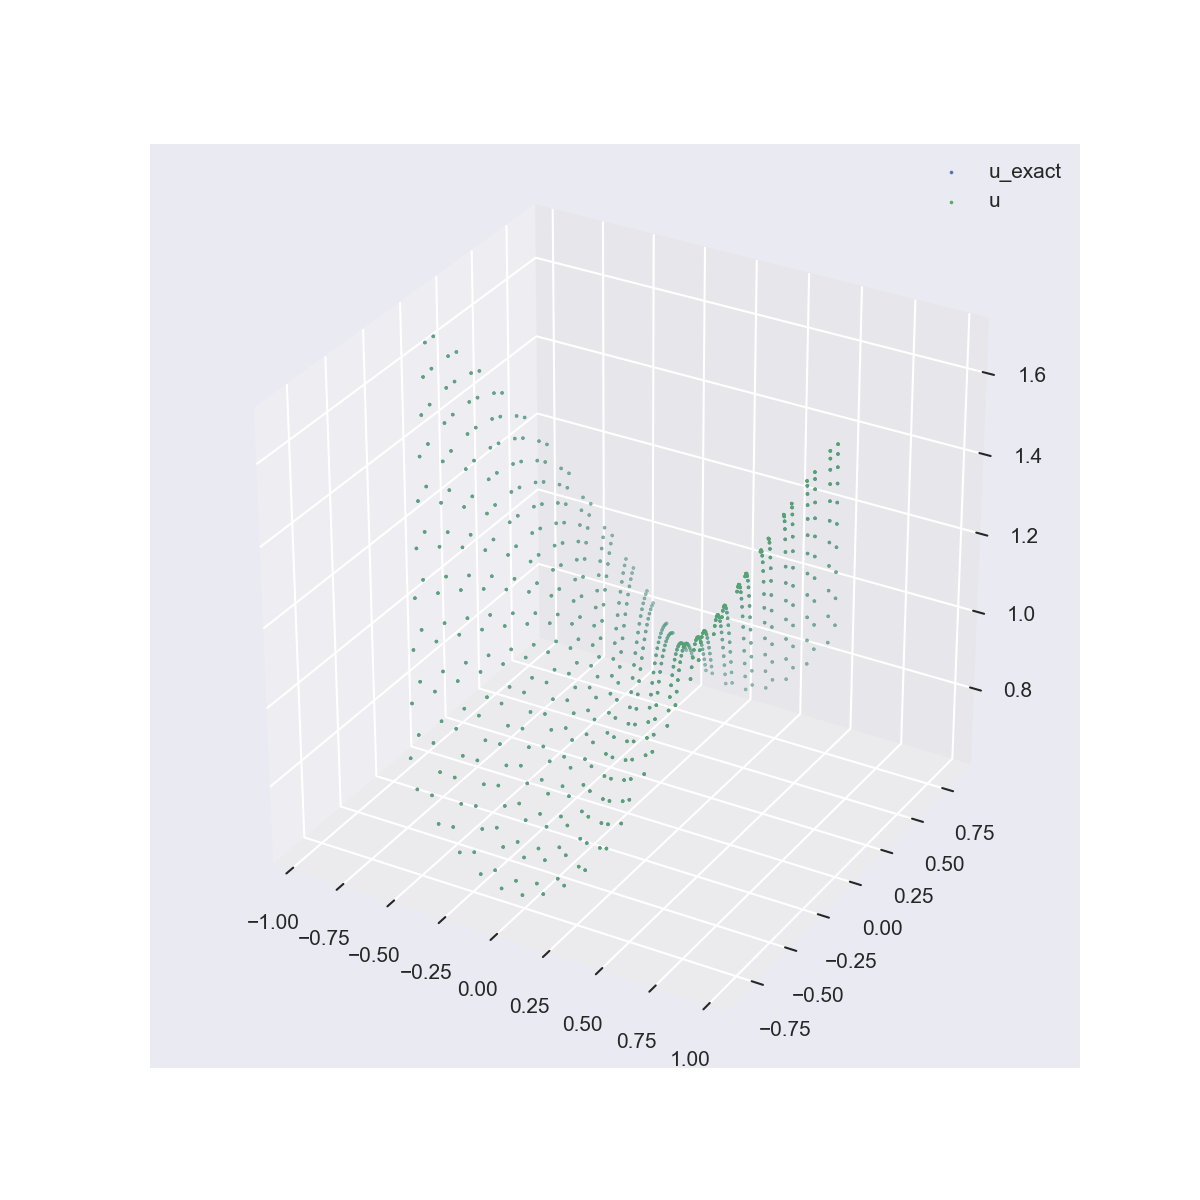

In [155]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, u_exact, s=2, label="u_exact")
ax.scatter(x, y, u, s=2, label="u")
ax.legend()


N = 20

In [156]:
N = 20
M = 6 * N * N #общее число треугольников
Matrix = np.zeros((M, M))
F = np.zeros((M))
num = 0
sqrt = math.sqrt(3)
for k in range(0, N):
    for i in range(0, 2 * N + (2 * k + 1)):
        if (i % 2 == 0):
            F[num] = fun(-1.0 / 2 + (i - k) * (1.0 / (2 * N)), -sqrt / 2 + 1.0 / (N * sqrt) + k * (sqrt / (N * 2)), N)
            if (i == 0 and k != N - 1):
                F[num] -= 2 * fun_border(-1.0 / 2 - k * (1.0 / (2 * N)) - 1.0 / (4 * N), -sqrt / 2 + sqrt / (4 * N) + k * (sqrt / (2 * N)))
                Matrix[num, num] = -4.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num + 2 * N + 2 * k + 1 + 1] = 1.0
            elif ((i == 2 * N + (2 * k + 1) - 1) and k != N - 1):
                F[num] -= 2 * fun_border(1.0 / 2 + k * (1.0 / (2 * N)) + 1.0 / (4 * N), -sqrt / 2 + sqrt / (4 * N) + k * (sqrt / (2 * N)))
                Matrix[num, num] = -4.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 2 * N + 2 * k + 1 + 1] = 1.0
            elif(i != 0 and i != (2 * N + (2 * k - 1) + 1) and k != N - 1):
                Matrix[num, num] = -3.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num + 2 * N + 2 * k + 1 + 1] = 1.0
            elif(i == 0 and k == N - 1):
                F[num] -= 2 * fun_border(-1.0 / 2 - k * (1.0 / (2 * N)) - 1.0 / (4 * N), -sqrt / 2 + sqrt / (4 * N) + k * (sqrt / (2 * N)))
                Matrix[num, num] = -4.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num + 2 * N + 2 * k + 1] = 1.0   
            elif ((i == 2 * N + (2 * k + 1) - 1) and k == N - 1):
                F[num] -= 2 * fun_border(1.0 / 2 + k * (1.0 / (2 * N)) + 1.0 / (4 * N), -sqrt / 2 + sqrt / (4 * N) + k * (sqrt / (2 * N)))
                Matrix[num, num] = -4.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 2 * N + 2 * k + 1] = 1.0
            elif(i != 0 and i != (2 * N + (2 * k + 1) - 1) and k == N - 1):
                Matrix[num, num] = -3.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num + 2 * N + 2 * k + 1] = 1.0                                                            
        else:
            F[num] = fun(-1.0 / 2 + (i - k) * (1.0 / (2 * N)), -sqrt / 2 + 1.0 / (2 * N * sqrt) + k * (sqrt / (N * 2)), N)
            if(k == 0):
                F[num] -= 2 * fun_border(-1.0 / 2 + i * (1.0 / (2 * N)), -sqrt / 2)
                Matrix[num, num] = -4.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 1] = 1.0
            else:
                Matrix[num, num] = -3.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num - (2 * N + 2 * k + 1 - 1)] = 1.0
        num += 1
for k in range(N - 1, -1, -1):
    for i in range(0, 2 * N + (2 * k + 1)):
        if (i % 2 == 0):
            F[num] = fun(1.0 / 2 - (i - k) * (1.0 / (2 * N)), sqrt / 2 - 1.0 / (N * sqrt) - k * (sqrt / (N * 2)), N)  
            if (i == 0 and k != N - 1):
                F[num] -= 2 * fun_border(-1.0 / 2 - k * (1.0 / (2 * N)) - 1.0 / (4 * N), sqrt / 2 - sqrt / (4 * N) - k * (sqrt / (2 * N)))
                Matrix[num, num] = -4.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num - (2 * N + 2 * k + 1 + 1)] = 1.0
            elif ((i == 2 * N + (2 * k + 1) - 1) and k != N - 1):
                F[num] -= 2 * fun_border(1.0 / 2 + k * (1.0 / (2 * N)) + 1.0 / (4 * N), sqrt / 2 - sqrt / (4 * N) - k * (sqrt / (2 * N)))
                Matrix[num, num] = -4.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num -(2 * N + 2 * k + 1 + 1)] = 1.0
            elif(i != 0 and i != (2 * N + (2 * k + 1) - 1) and k != N - 1):
                Matrix[num, num] = -3.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num - (2 * N + 2 * k + 1 + 1)] = 1.0
            elif(i == 0 and k == N - 1):
                F[num] -= 2 * fun_border(-1.0 / 2 - k * (1.0 / (2 * N)) - 1.0 / (4 * N), sqrt / 2 - sqrt / (4 * N) - k * (sqrt / (2 * N)))
                Matrix[num, num] = -4.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num - (2 * N + 2 * k + 1 + 1) + 1] = 1.0   
            elif ((i == 2 * N + (2 * k + 1) - 1) and k == N - 1):
                F[num] -= 2 * fun_border(1.0 / 2 + k * (1.0 / (2 * N)) + 1.0 / (4 * N), sqrt / 2 - sqrt / (4 * N) - k * (sqrt / (2 * N)))
                Matrix[num, num] = -4.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num - (2 * N + 2 * k + 1 + 1) + 1] = 1.0
            elif(i != 0 and i != (2 * N + (2 * k + 1) - 1) and k == N - 1):
                Matrix[num, num] = -3.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num - (2 * N + 2 * k + 1 + 1) + 1] = 1.0
        else:
            F[num] = fun(-1.0 / 2 + (i - k) * (1.0 / (2 * N)), sqrt / 2 - 1.0 / (2 * N * sqrt) - k * (sqrt / (N * 2)), N)
            if(k == 0):
                F[num] -= 2 * fun_border(-1.0 / 2 + i * (1.0 / (2 * N)), sqrt / 2)
                Matrix[num, num] = -4.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 1] = 1.0
            else:
                Matrix[num, num] = -3.0
                Matrix[num, num - 1] = 1.0
                Matrix[num, num + 1] = 1.0
                Matrix[num, num + (2 * N + 2 * k + 1 - 1)] = 1.0
        num += 1

In [157]:
Matrix_inv = np.linalg.inv(Matrix)
u = Matrix_inv.dot(F)

In [158]:
u_exact = np.zeros((M))
x = np.zeros((M))
y = np.zeros((M))
num = 0
for k in range(0, N):
    for i in range(0, 2 * N + (2 * k + 1)):
        if (i % 2 == 0):
            x[num] = -1.0 / 2 + (i - k) * (1.0 / (2 * N))
            y[num] = -sqrt / 2 + 1.0 / (N * sqrt) + k * (sqrt /(N * 2))  
        else:
            x[num] = -1.0 / 2 + (i - k) * (1.0 / (2 * N))
            y[num] = -sqrt / 2 + 1.0 / (2 * N * sqrt) + k * (sqrt /(N * 2))
        num += 1
for k in range(N - 1, -1, -1):
    for i in range(0, 2 * N + (2 * k + 1)):
        if (i % 2 == 0):
            x[num] = -1.0 / 2 + (i - k) * (1.0 / (2 * N))
            y[num] = sqrt / 2 - 1.0 / (N * sqrt) - k * (sqrt /(N * 2))
        else:
            x[num] = -1.0 / 2 + (i - k) * (1.0 / (2 * N))
            y[num] = sqrt / 2 - 1.0 / (2 * N * sqrt) - k * (sqrt /(N * 2))
        num += 1
for num in range(0, M):
    u_exact[num] = fun_border(x[num], y[num])

In [159]:
err = max(abs(u - u_exact))
print(err)

8.445040157467609e-05


<IPython.core.display.Javascript object>


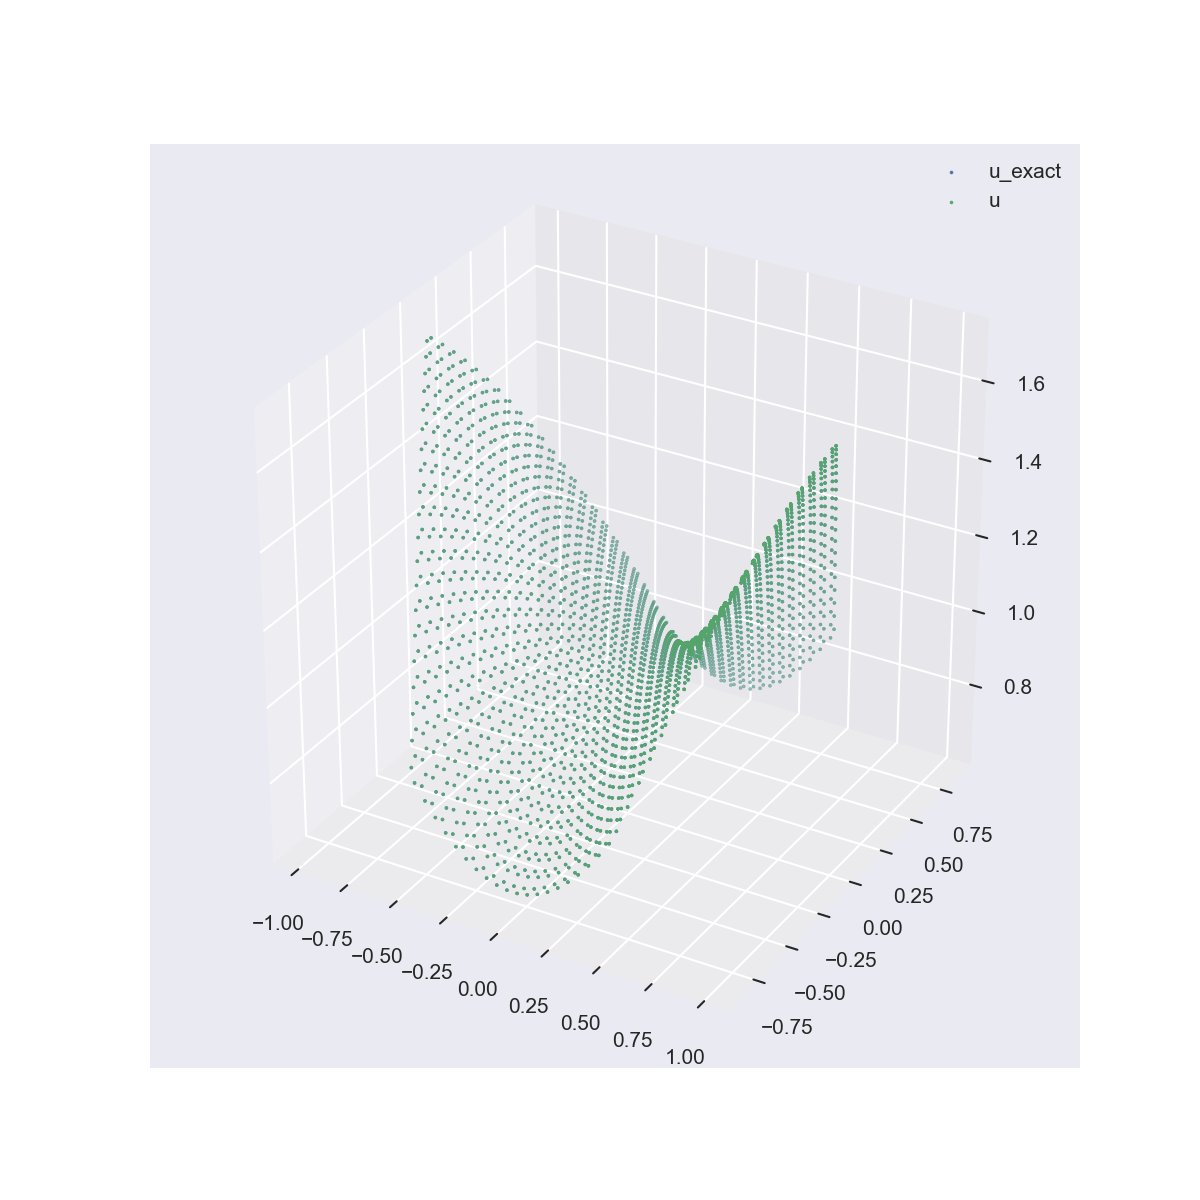

In [160]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, u_exact, s=2, label="u_exact")
ax.scatter(x, y, u, s=2, label="u")
ax.legend()
